In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
# Load the data
data = pd.read_csv('Student_Marks.csv')

In [5]:
print("Tota Rows and Columns (Rows,Columns) : ",data.shape)
data.head(10)

Tota Rows and Columns (Rows,Columns) :  (100, 3)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
# Check for missing values
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [11]:
#check for duplicate values
print("jumlah duplikasi data :", data.duplicated().sum())

jumlah duplikasi data : 0


In [12]:
#Summary statistics
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


# ANN model


In [19]:
#build ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense

#split data into features and target x=     y=marks 
X = data.drop('Marks', axis=1)
y = data['Marks']


# Split the dataset into 80% Training set and 20% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:
# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 2))

# Add the second hidden layer
model.add(Dense(6, activation = 'relu'))

# Add the output layer
model.add(Dense(1))

# Compile the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#summary model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the ANN model
model.fit(X_train, Y_train, batch_size=10, epochs=100)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 772.4762  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 778.7548 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 830.0382 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 707.7237 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 669.8580 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 722.3373 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 777.6398
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 626.7428
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 681.8975
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 816.4478 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 688.3338
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 684.7740
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 807.0203
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 636.4255
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Mean Squared Error: 5.721238691939037


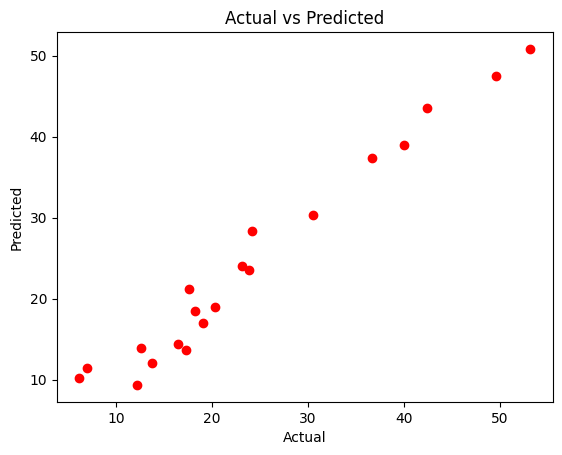

In [25]:
# Predict the results of the Test set
Y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(Y_test, Y_pred, color = 'red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
#evaluate model
score = model.evaluate(X_test, Y_test)
print(score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 5.7212
5.721238136291504


In [27]:
#conclusion
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("Mean Absolute Error:", np.sqrt(mse))
print("Mean Squared Log Error:", np.sqrt(mse))
print("R2 Score:", np.sqrt(mse))
print("Score:", score)
print("Accuracy:", 100 - score)

        

Mean Squared Error: 5.721238691939037
Root Mean Squared Error: 2.3919110961611922
Mean Absolute Error: 2.3919110961611922
Mean Squared Log Error: 2.3919110961611922
R2 Score: 2.3919110961611922
Score: 5.721238136291504
Accuracy: 94.2787618637085
